خواندن دیتا

In [1]:
import pandas as pd
housing = pd.read_csv('housing_data.csv', encoding='gbk')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5756\259660202.py:2: DtypeWarning: Columns (6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('housing_data.csv', encoding='gbk')


بررسی اولیه

In [2]:
housing.shape

(318851, 18)

In [3]:
housing.head(5)

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,8/9/2016,1464.0,415.0,131.00,2,1,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,116.453917,39.881534,7/28/2016,903.0,575.0,132.38,2,2,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,116.561978,39.877145,12/11/2016,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,116.438010,40.076114,9/30/2016,965.0,297.5,134.00,3,1,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,116.428392,39.886229,8/28/2016,927.0,392.0,81.00,2,1,1,1,中 6,1960,2,2,0.333,0.0,1.0,1


یافتن مقادیر گمشده

In [5]:
housing_null = pd.DataFrame(housing.isna().sum())
housing_null

,0
Lng,0
Lat,0
tradeTime,0
DOM,157977
totalPrice,0
square,0
livingRoom,0
drawingRoom,0
kitchen,0
bathRoom,0


DOM بررسی دیتاهای ستون

<Axes: >

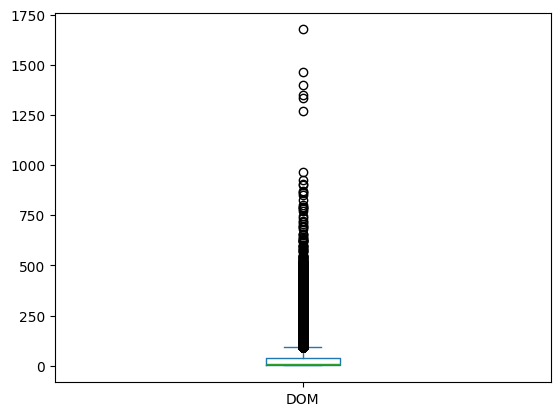

In [6]:
housing.DOM.plot(kind = 'box')

In [7]:
housing_no_missing = housing.copy()

جایگزینی مقادیر گمشده آن ستون با مد 

In [8]:
housing_no_missing["DOM"] = housing_no_missing["DOM"].fillna(housing_no_missing["DOM"].mode())

حذف ردیف هایی که آسانسور یا مترو ندارند

In [9]:
housing_no_missing.dropna(subset=['elevator', 'subway'],inplace=True)

بررسی خالی نبودن هیچکدام از ستون ها

In [10]:
housing_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  160849 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  object 
 7   drawingRoom          318819 non-null  object 
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  object 
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  int64  
 13  buildingStructure    318819 non-null  int64  
 14  ladderRatio          318819 non-null  float64
 15  elevator             3

تبدیل مقادیر عددی ستون ها به رشته متنی

In [11]:
housing_categorical = housing_no_missing.copy()

housing_categorical.replace({"elevator":{0:"no elevator",1:"has elevator"}},inplace=True)
housing_categorical.replace({"subway":{0:"no subway",1:"has subway"}},inplace=True)
housing_categorical.replace({"buildingStructure":{1:"unknown",2:"mixed",3:"brick and wood",4:"concrete",5:"steel",6:"steel-concrete composite"}},inplace=True)
housing_categorical.replace({"renovationCondition":{1:"other",2:"rough",3:"Simplicity",4:"hardcover"}},inplace=True)

housing_categorical.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,8/9/2016,1464.0,415.0,131.00,2,1,1,1,高 26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,7/28/2016,903.0,575.0,132.38,2,2,1,2,高 22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,12/11/2016,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,9/30/2016,965.0,297.5,134.00,3,1,1,1,底 21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,8/28/2016,927.0,392.0,81.00,2,1,1,1,中 6,1960,rough,mixed,0.333,no elevator,has subway,1


حذف ردیف خانه هایی که سال ساخت نامشخص دارند

In [12]:
housing_construction = housing_categorical.copy()

housing_construction = housing_construction[~housing_construction['constructionTime'].str.contains('[\u4e00-\u9fff]', na=False)]

housing_construction['constructionTime'] = housing_construction['constructionTime'].astype(int)

housing_construction.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,8/9/2016,1464.0,415.0,131.00,2,1,1,1,高 26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,7/28/2016,903.0,575.0,132.38,2,2,1,2,高 22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,12/11/2016,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,9/30/2016,965.0,297.5,134.00,3,1,1,1,底 21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,8/28/2016,927.0,392.0,81.00,2,1,1,1,中 6,1960,rough,mixed,0.333,no elevator,has subway,1


 FLOOR استخراج مقدار عددی ستون 

In [13]:
housing_floor = housing_construction.copy()

housing_floor['floor'] = housing_floor['floor'].str.extract('(\d+)').astype(int)

housing_floor.head()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5756\2944374478.py:3: SyntaxWarning: invalid escape sequence '\d'
  housing_floor['floor'] = housing_floor['floor'].str.extract('(\d+)').astype(int)


,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,8/9/2016,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,7/28/2016,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,12/11/2016,1271.0,1030.0,198.00,3,2,1,3,4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,9/30/2016,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,8/28/2016,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1


شناسایی داده های پرت 

<Axes: >

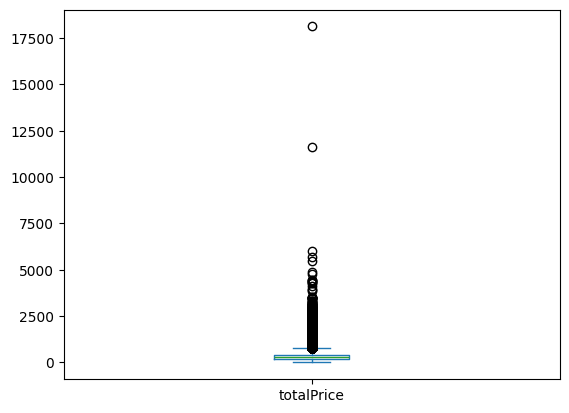

In [14]:
housing_floor.totalPrice.plot(kind = 'box')

حذف داده های پرت

In [15]:
Q1 = housing_floor['totalPrice'].quantile(0.25)
Q3 = housing_floor['totalPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

housing_no_outlier = housing_floor[(housing_floor['totalPrice'] >= lower_bound) & (housing_floor['totalPrice'] <= upper_bound)]


print('Number of removed outliers : ', housing_floor.shape[0] - housing_no_outlier.shape[0])

Number of removed outliers :  14496


<Axes: >

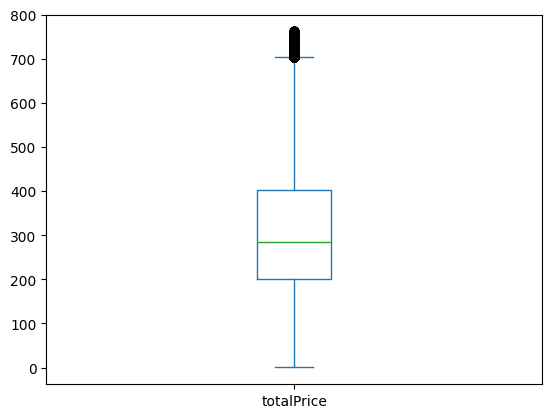

In [16]:
housing_no_outlier.totalPrice.plot(kind = 'box')

محاسبه فاصله هر خانه تا مرکز چین

In [17]:
import numpy as np
from math import radians

capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)

housing_capital = housing_no_outlier.copy()
lat_rad = np.radians(housing_capital['Lat'])
lng_rad = np.radians(housing_capital['Lng'])


housing_capital['distanceToCapital'] = (np.arccos(np.sin(capital_Lat) * np.sin(lat_rad) + np.cos(capital_Lat) * np.cos(lat_rad) * np.cos(lng_rad - capital_Lng)) * 6371.0088)

housing_capital.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital
0,116.475489,40.019520,8/9/2016,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996
1,116.453917,39.881534,7/28/2016,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224
3,116.438010,40.076114,9/30/2016,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041
4,116.428392,39.886229,8/28/2016,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335
5,116.466280,39.991363,7/22/2016,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652


محاسبه قیمت هر متر مربع خانه

In [18]:
housing_PPS = housing_capital.copy()

housing_PPS['pricePerSquare'] = housing_PPS["totalPrice"]/housing_PPS["square"]*1000

housing_PPS.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,8/9/2016,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,7/28/2016,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
3,116.438010,40.076114,9/30/2016,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
4,116.428392,39.886229,8/28/2016,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
5,116.466280,39.991363,7/22/2016,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000


بررسی هیستوگرام ستون های عددی

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5756\4221953701.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  housing_PPS.hist(ax = ax, bins = 20);


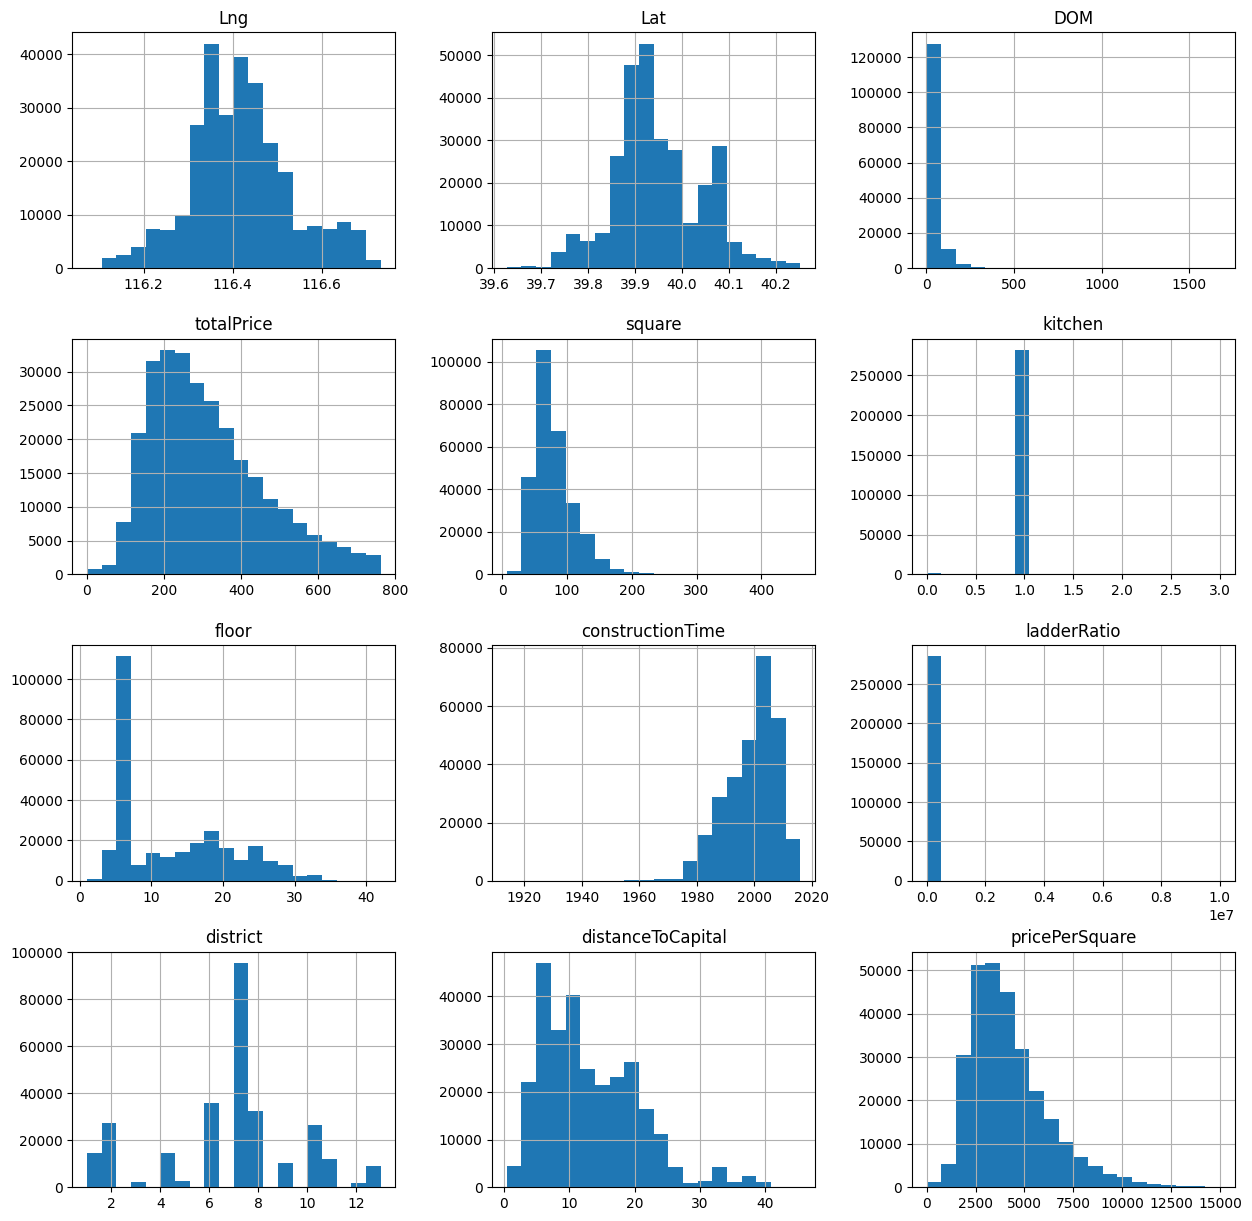

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , ax = plt.subplots()
fig.set_size_inches(15,15)
housing_PPS.hist(ax = ax, bins = 20);

بررسی اینکه با دور شدن از مرکز شهر قیمت هر متر مربع از خانه چگونه تغییر میکند

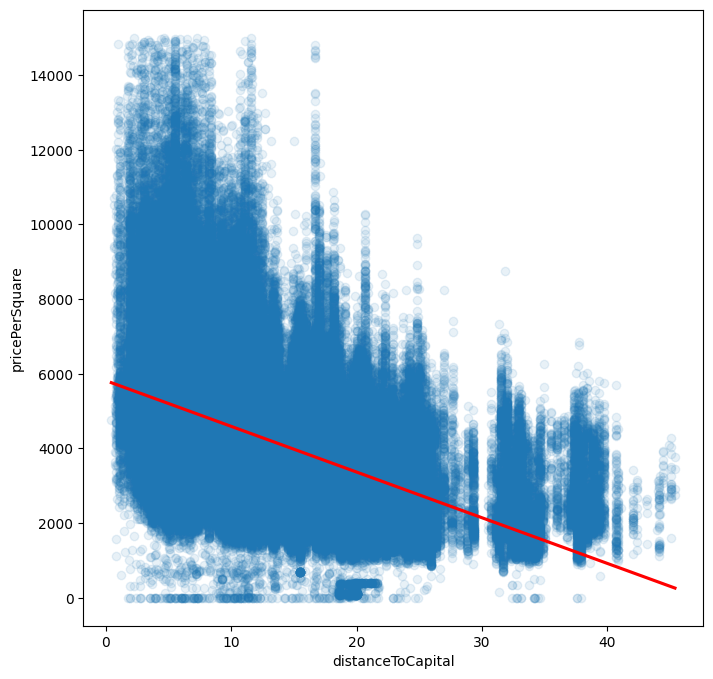

In [20]:
fig , ax = plt.subplots()
fig.set_size_inches(8,8)

sns.regplot(ax = ax, data = housing_PPS, x = 'distanceToCapital', y = 'pricePerSquare', line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

بررسی تاثیر داشتن آسانسور بر قیمت هر متر مربع خانه

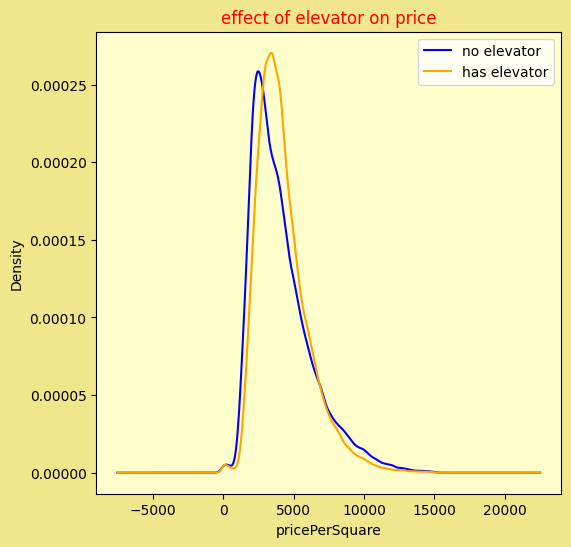

In [21]:
fig, ax = plt.subplots(figsize=(6,6))
housing_PPS[housing_PPS['elevator'] == 'no elevator']['pricePerSquare'].plot(kind='density', ax=ax, label='no elevator',color='blue')

housing_PPS[housing_PPS['elevator'] == 'has elevator']['pricePerSquare'].plot(kind='density', ax=ax, label='has elevator',color='orange')

ax.set_title('effect of elevator on price', color='red')
ax.set_xlabel('pricePerSquare')
ax.set_ylabel('Density')


ax.set_facecolor('#ffffcc')
fig.set_facecolor('khaki')

ax.legend()
plt.show()

برداشتن سمپل از دیتافریم به جهت سنگین نشدن تحلیل ها

In [22]:
housing_sample = housing_PPS.iloc[:-100:100]
housing_sample.shape

(2850, 20)

ترسیم خانه ها روی صفحه با کمک طول و عرض جغرافیایی

Text(0.5, 1.0, 'scatter plot')

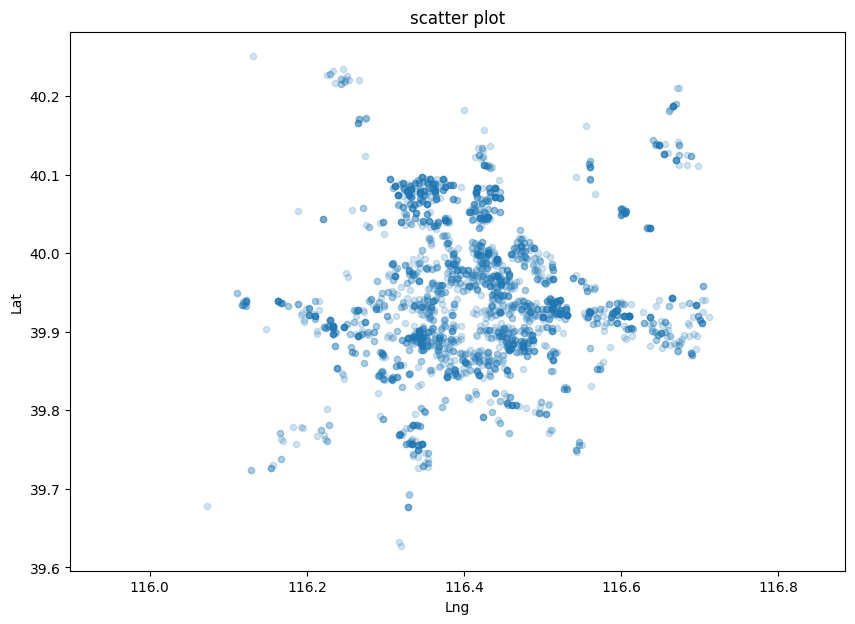

In [23]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(10,7)

housing_sample.plot(x='Lng', y='Lat', ax=ax1, kind='scatter', alpha=0.2)
ax1.axis('equal')
ax1.set_title('scatter plot')

بررسی قیمت هر متر مربع خانه بر اساس موقعیت

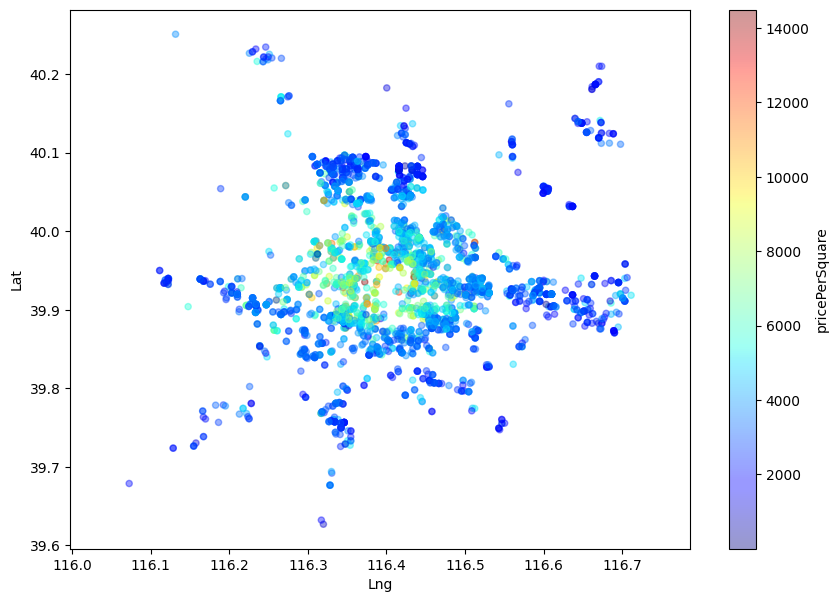

In [24]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(10,7)

housing_sample.plot(x='Lng', y='Lat', ax=ax2, kind='scatter', alpha=0.4,c='pricePerSquare', cmap=plt.get_cmap("jet"), colorbar=True)

ax2.axis('equal');

مشخص کردن مرکز شهر

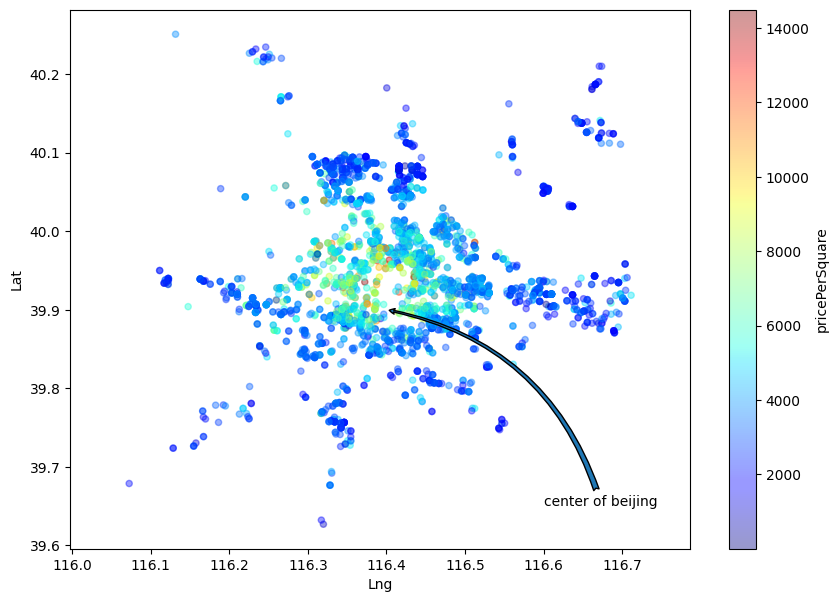

In [25]:
from matplotlib.patches import ConnectionStyle
connectionstyle = ConnectionStyle("Arc3", rad=0.3)

ax2.annotate("center of beijing",xy=(116.40, 39.90),xytext=(116.6, 39.65),arrowprops=dict(arrowstyle="fancy",connectionstyle=connectionstyle))

fig2